ANGGOTA KELOMPOK:

3221237 - FYGA KHOIRUNNISA

3221254 - MARLIA

3221310 - YANI YULIANTI


PRAKTIKUM 4 BIG DATA ANALYSIS (REVISI)

IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score

READ DATASET

In [2]:
data = pd.read_csv('titanic.csv', delimiter=',')
df = pd.DataFrame(data)

PREPROCESSING DATASET

In [3]:
df.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,First,"Allen, Miss. Elisabeth Walton",Female,29.0000,0,0,24160,211.3375,B5,Southampton,2,Yes
1,First,"Allison, Master. Hudson Trevor",Male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,Yes
2,First,"Allison, Miss. Helen Loraine",Female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
3,First,"Allison, Mr. Hudson Joshua Creighton",Male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No
4,First,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",Female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,No


In [4]:
# Informasi dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   object 
 1   Name                                1309 non-null   object 
 2   Sex                                 1309 non-null   object 
 3   Age                                 1046 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   object 
 7   Passenger Fare                      1308 non-null   float64
 8   Cabin                               295 non-null    object 
 9   Port of Embarkation                 1307 non-null   object 
 10  Life Boat                           486 non-null    object 
 11  Survived                            1309 no

In [5]:
# Mengecek data yang kosong pada setiap kolom
df.isnull().sum()

Passenger Class                          0
Name                                     0
Sex                                      0
Age                                    263
No of Siblings or Spouses on Board       0
No of Parents or Children on Board       0
Ticket Number                            0
Passenger Fare                           1
Cabin                                 1014
Port of Embarkation                      2
Life Boat                              823
Survived                                 0
dtype: int64

In [6]:
# Mengisi missing values
df.fillna(data.median(numeric_only=True), inplace=True)
df.fillna(data.mode().iloc[0], inplace=True) 

In [7]:
# Mengubah data kategorikal menjadi numerik
label_encoders = {}
for column in ["Passenger Class", "Name", "Sex", "Ticket Number", "Cabin", "Port of Embarkation", "Life Boat", "Survived"]:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column].astype(str))
    label_encoders[column] = encoder

In [8]:
# Menyalin dataset yang sudah dipreprocessing ke dalam variabel "data_clean"
data_clean = df.copy()

In [9]:
# Menampilkan kembali informasi terkait dataset yang sudah dipreprocessing
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Passenger Class                     1309 non-null   int64  
 1   Name                                1309 non-null   int64  
 2   Sex                                 1309 non-null   int64  
 3   Age                                 1309 non-null   float64
 4   No of Siblings or Spouses on Board  1309 non-null   int64  
 5   No of Parents or Children on Board  1309 non-null   int64  
 6   Ticket Number                       1309 non-null   int64  
 7   Passenger Fare                      1309 non-null   float64
 8   Cabin                               1309 non-null   int64  
 9   Port of Embarkation                 1309 non-null   int64  
 10  Life Boat                           1309 non-null   int64  
 11  Survived                            1309 no

In [10]:
# Menampilkan data teratas dari dataset yang sudah dipreprocessing
data_clean.head()

,Passenger Class,Name,Sex,Age,No of Siblings or Spouses on Board,No of Parents or Children on Board,Ticket Number,Passenger Fare,Cabin,Port of Embarkation,Life Boat,Survived
0,0,21,0,29.0000,0,0,187,211.3375,43,2,11,1
1,0,23,1,0.9167,1,2,49,151.5500,79,2,2,1
2,0,24,0,2.0000,1,2,49,151.5500,79,2,4,0
3,0,25,1,30.0000,1,2,49,151.5500,79,2,4,0
4,0,26,0,25.0000,1,2,49,151.5500,79,2,4,0



Korelasi setiap fitur dengan 'Survived':
Survived                              1.000000
Life Boat                             0.603897
Passenger Fare                        0.244414
Cabin                                 0.092334
No of Parents or Children on Board    0.082660
No of Siblings or Spouses on Board   -0.027825
Name                                 -0.032298
Age                                  -0.043818
Ticket Number                        -0.125869
Port of Embarkation                  -0.175313
Passenger Class                      -0.312469
Sex                                  -0.528693
Name: Survived, dtype: float64


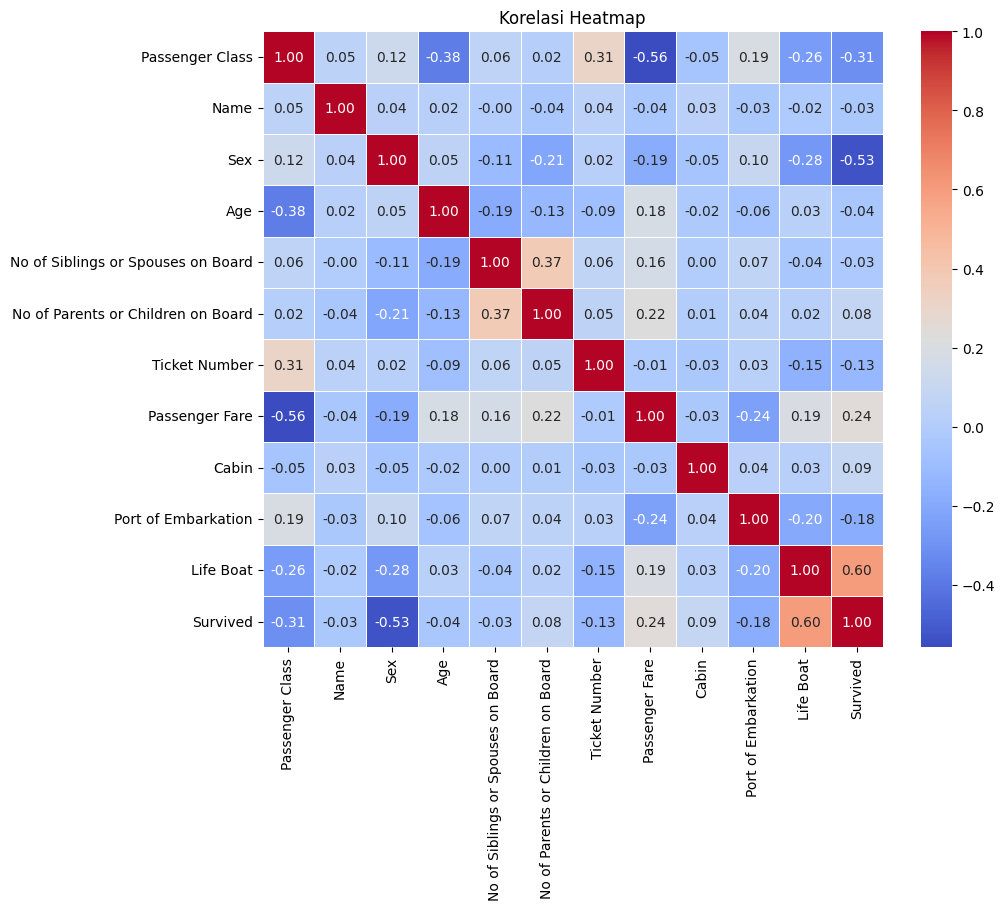

In [11]:
# Menghitung korelasi setiap feature/kolom dengan kolom "Survived"
correlation_matrix = data_clean.corr()

# Ekstrak korelasi dengan Survived
survived_correlation = correlation_matrix["Survived"].sort_values(ascending=False)
print("\nKorelasi setiap fitur dengan 'Survived':")
print(survived_correlation)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Heatmap")
plt.show()

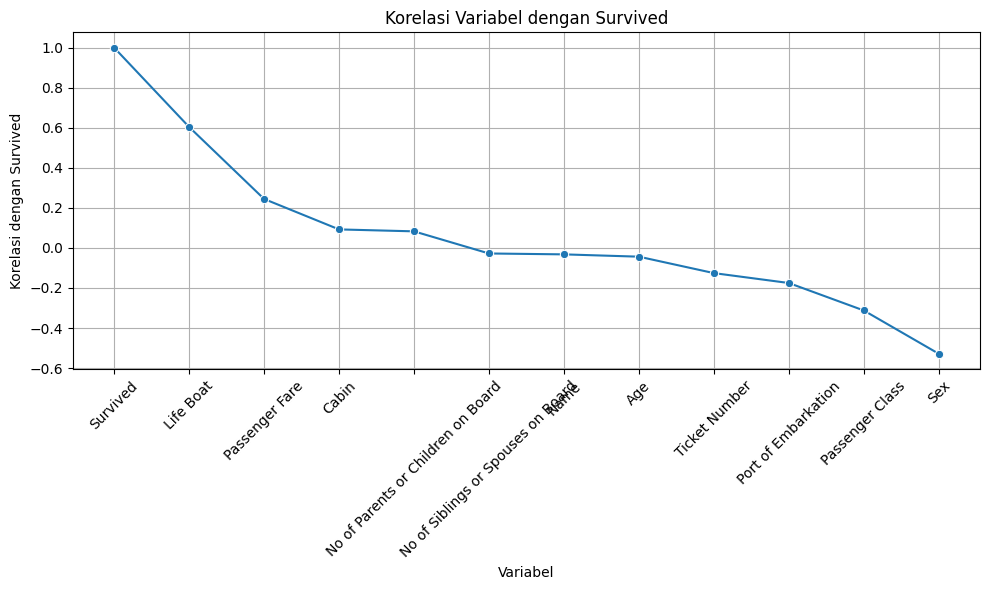

In [12]:
# Membuat plot lineplot untuk korelasi
plt.figure(figsize=(10, 6))
sns.lineplot(data=survived_correlation, marker='o')

# Menambahkan judul dan label sumbu
plt.title('Korelasi Variabel dengan Survived')
plt.xlabel('Variabel')
plt.ylabel('Korelasi dengan Survived')
plt.xticks(ticks=range(len(survived_correlation.index)), labels=survived_correlation.index, rotation=45)
plt.grid()

# Mengatur tata letak agar lebih rapi
plt.tight_layout()
plt.show()

In [13]:
# Melakukan splitting dataset
X = data_clean[['Sex', 'Age', 'No of Siblings or Spouses on Board', 'No of Parents or Children on Board', 'Passenger Class', 'Passenger Fare', 'Cabin', 'Port of Embarkation']]
y = data_clean['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Menghitung menggunakan model KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Menghitung menggunakan model Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [16]:
# Menghitung menggunakan model Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Users\yaniyul\anaconda3\envs\bigdata\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
# Menghitung menggunakan model SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [18]:
# Fungsi untuk menghitung dan mencetak metrik dari confusion matrix
def calculate_metrics(y_true, y_pred_binary, model_name):
    cm = confusion_matrix(y_true, y_pred_binary)
    accuracy = accuracy_score(y_true, y_pred_binary)
    recall = recall_score(y_true, y_pred_binary, average='binary')
    f1 = f1_score(y_true, y_pred_binary, average='binary')
    precision = precision_score(y_true, y_pred_binary, average='binary')

    print(f"{model_name} - Akurasi: {accuracy:.2f}, Recall: {recall:.2f}, Precision: {precision:.2f}, F1-Score: {f1:.2f}")
    return cm, accuracy, recall, f1, precision

In [19]:
# Fungsi untuk menggambar confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

KNN - Akurasi: 0.66, Recall: 0.43, Precision: 0.66, F1-Score: 0.52


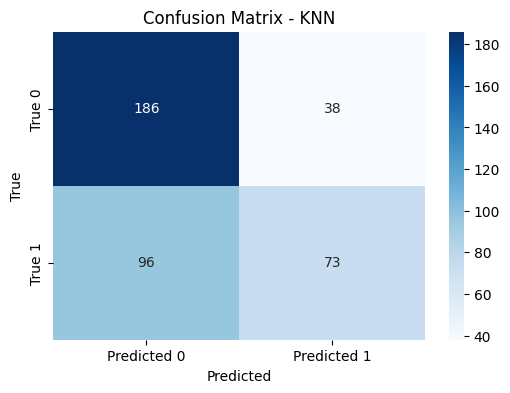

Naive Bayes - Akurasi: 0.72, Recall: 0.53, Precision: 0.75, F1-Score: 0.62


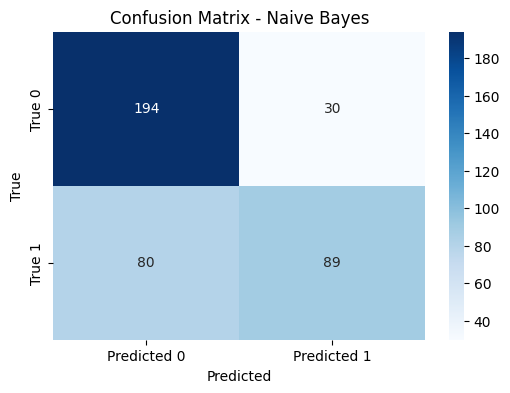

Logistic Regression - Akurasi: 0.80, Recall: 0.67, Precision: 0.83, F1-Score: 0.74


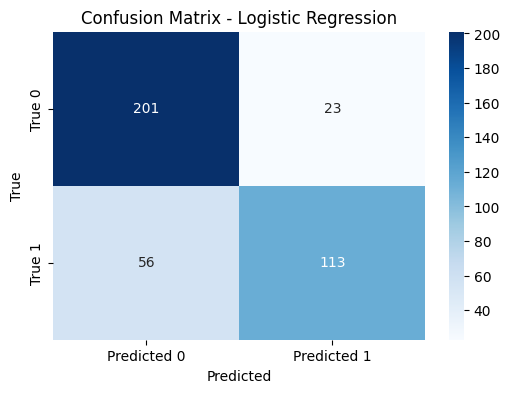

SVM - Akurasi: 0.79, Recall: 0.67, Precision: 0.80, F1-Score: 0.73


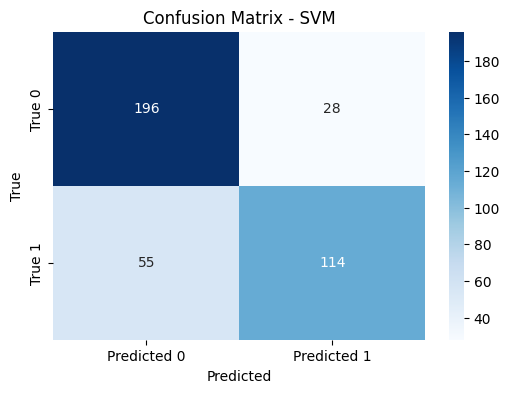

In [20]:
# Menghitung dan menampilkan confusion matrix serta metrik untuk setiap model
models = {
    "KNN": knn.predict(X_test),
    "Naive Bayes": nb.predict(X_test),
    "Logistic Regression": model.predict(X_test),
    "SVM": svm.predict(X_test)
}

metrics_summary = {}
for model_name, y_pred in models.items():
    cm, acc, recall, f1, precision = calculate_metrics(y_test, y_pred, model_name)
    metrics_summary[model_name] = [acc, recall, precision, f1]
    plot_confusion_matrix(cm, model_name)

In [21]:
# Menyimpan model
with open('model_regresi.pkl', 'wb') as file:
    pickle.dump(model, file)

In [22]:
with open('model_regresi.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [23]:
type(loaded_model)

sklearn.linear_model._logistic.LogisticRegression

In [42]:
data_input = pd.DataFrame([["male", 20, 0, 0, 3, 1,"CA0", "C"]],
                          columns=['Sex', 'Age', 'No of Siblings or Spouses on Board', 'No of Parents or Children on Board', 'Passenger Class', 'Passenger Fare', 'Cabin', 'Port of Embarkation'])

In [43]:
# Mengubah data kategorikal menjadi numerik
label_encoders = {}
for column in ["Sex", "Cabin", "Port of Embarkation"]:
    encoder = LabelEncoder()
    data_input[column] = encoder.fit_transform(data_input[column].astype(str))
    label_encoders[column] = encoder

input_clean = data_input.copy()

In [45]:
# Melakukan prediksi dengan model
prediksi = model.predict(input_clean)

if prediksi == 0:
    print("Mati")
else:
    print("Hidup")

Mati
